 

      



--------------
You are given some artificial data. The relation between y-x is polynomial with noisy. You need to: 
    
    (1) transform data to different degrees:
        a. d = 3
        b. d = 5
        c. d = 20
        or other degrees you want.  
          
    (2) For each degree:
        a. apply linear model 
        b. calculate the MSE (mean squared error)
        c. plot the model predictions
        
    (3) write a short summary in the last markdown cell  
      
    (4) (optional) plot a learning curve with many degree choices  (MSE ~ degree)

#  Polynomial Regression to Multi-linear Regression

---

    When data does not have linear relationship between the independent variables x and response variable y (or the outcome), we have to look for more complicated models. For Polynomial models,  we can convert polynomial relation into multi-linear relation. Thus, we are still working on linear regression. 


Suppose we use the following polymonial equation to match the data:

$$ y = b + w_{1}*x + w_{2}x^{2} + .... + w_{d}x^{d} $$

Where d is the degree of the polynomial.

What we can do: transformation:  
$$   x  -> x_{1} $$  
$$   x^{2}  -> x_{2} $$  
$$ .......... $$  
$$   x^{d}  -> x_{d} $$  

Now the problem becomes:
$$ y = b + w_{1}*x_{1} + w_{2}x_{2} + .... + w_{d}x_{d} $$
  
  
This is again another multi-linear regression problem.

## import some modules

In [26]:
pip install numpy

In [27]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Import python modules 
import math
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


## load data into memory and visualize the data

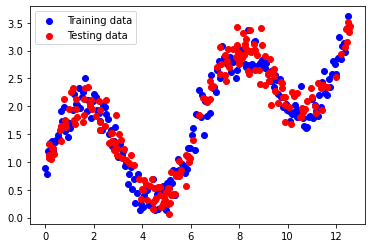

In [96]:
# deRead in train and test synthetic data from local storage
train_x = np.loadtxt(r"C:\Users\lukel\OneDrive\Desktop\Machine Learning\HW2\data_train.txt", delimiter = ',', dtype=float)
train_y = np.loadtxt(r"C:\Users\lukel\OneDrive\Desktop\Machine Learning\HW2\label_train.txt", delimiter = ',', dtype=float)

test_x =  np.loadtxt(r"C:\Users\lukel\OneDrive\Desktop\Machine Learning\HW2\data_test.txt", delimiter = ',', dtype=float)
test_y =  np.loadtxt(r"C:\Users\lukel\OneDrive\Desktop\Machine Learning\HW2\label_test.txt", delimiter = ',', dtype=float)

# (1) get data and labels
train_x = train_x.reshape(-1,1) # data changed to column vector
test_x = test_x.reshape(-1,1) # data changed to column vector

# show the data in plotting
plt.scatter(train_x, train_y, color='blue', label = "Training data")
plt.scatter(test_x, test_y,  color='red', label = "Testing data")
plt.legend()
plt.show()

In [97]:
# take some data from the scaled data for test now
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_prepared, housing_labels, test_size=0.2)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(200, 1) (200, 1) (200,) (200,)


## Data transformation (d=3)

In [119]:
# transform data to higher order
# my code
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(test_x)
X_poly[0]

array([  5.56832   ,  31.00618762, 172.65237466])

## Apply linear models

In [120]:
# Now we can use the linear model
from sklearn.linear_model import LinearRegression
# Your code
lin_reg= LinearRegression()
lin_reg.fit(X_poly, train_y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

2.033358427818409
[-6.31973520e-02  3.08215172e-03  5.96775669e-05]


In [121]:
#print("MSE=", MSE)

from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_poly)

#X_poly = X_poly.reshape(-1,1) #data changed to column vector

lin_mse = mean_squared_error(train_y, predictions)
lin_rmse = np.sqrt(lin_mse)

print("MSE=", lin_rmse)

MSE= 0.8338303881926135


## Plotting

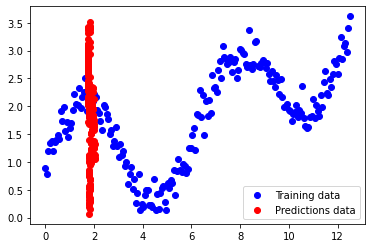

In [122]:
import matplotlib.pyplot as plt

# you code
plt.scatter(train_x, train_y, color='blue', label = "Training data")
plt.scatter(predictions, test_y, color='red', label = "Predictions data")
plt.legend()
plt.show()


## Data transformation (d=5)

In [123]:
# transform data to higher order

# your code
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(test_x)
X_poly[0]

array([   5.56832   ,   31.00618762,  172.65237466,  961.38367088,
       5353.29192221])

## Apply linear models

In [124]:
# Now we can use the linear model
from sklearn.linear_model import LinearRegression
# Your code
lin_reg= LinearRegression()
lin_reg.fit(X_poly, train_y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

2.255108994497192
[-5.40795983e-01  2.52563070e-01 -5.05465545e-02  4.37848784e-03
 -1.35527087e-04]


In [125]:
#print("MSE=", MSE)

from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_poly)

#X_poly = X_poly.reshape(-1,1) #data changed to column vector

lin_mse = mean_squared_error(train_y, predictions)
lin_rmse = np.sqrt(lin_mse)

print("MSE=", lin_rmse)

MSE= 0.8320957173701815


## Plotting

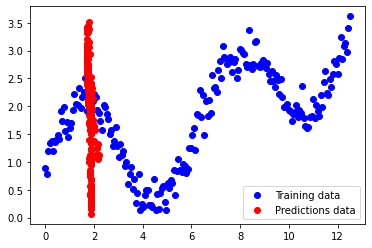

In [126]:
import matplotlib.pyplot as plt

# your code
plt.scatter(train_x, train_y, color='blue', label = "Training data")
plt.scatter(predictions, test_y, color='red', label = "Predictions data")
plt.legend()
plt.show()

## Data transformation (d=20)

In [127]:
# transform data to higher order

# your code
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly = poly_features.fit_transform(test_x)
X_poly[0]

array([5.56832000e+00, 3.10061876e+01, 1.72652375e+02, 9.61383671e+02,
       5.35329192e+03, 2.98088425e+04, 1.65985174e+05, 9.24258563e+05,
       5.14656744e+06, 2.86577344e+07, 1.59575436e+08, 8.88567090e+08,
       4.94782590e+09, 2.75510779e+10, 1.53413218e+11, 8.54253891e+11,
       4.75675902e+12, 2.64871564e+13, 1.47488963e+14, 8.21265741e+14])

## Apply linear models

In [128]:
# Now we can use the linear model
from sklearn.linear_model import LinearRegression
# Your code
lin_reg= LinearRegression()
lin_reg.fit(X_poly, test_y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

1.2852430988949062
[-2.84458693e-15 -1.15188763e-11 -1.81665712e-13 -5.74028169e-13
 -2.86566579e-12 -1.36421251e-11 -6.12954564e-11 -2.55997928e-10
 -9.70345433e-10 -3.21344158e-09 -8.69995450e-09 -1.67396330e-08
 -1.41913207e-08  1.54227379e-08 -5.15104336e-09  8.89536467e-10
 -8.93292324e-11  5.28477231e-12 -1.71517306e-13  2.36285694e-15]


In [129]:
#print("MSE=", MSE)

from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_poly)

#X_poly = X_poly.reshape(-1,1) #data changed to column vector

lin_mse = mean_squared_error(train_y, predictions)
lin_rmse = np.sqrt(lin_mse)

print("MSE=", lin_rmse)

MSE= 1.1829840920855834


## Plotting

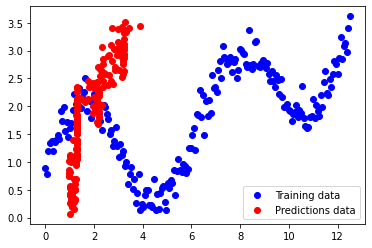

In [130]:
import matplotlib.pyplot as plt

# your code
plt.scatter(train_x, train_y, color='blue', label = "Training data")
plt.scatter(predictions, test_y, color='red', label = "Predictions data")
plt.legend()
plt.show()

# Sample  run ploting for your reference

## underfitted: 
MSE= 0.5368444256448234
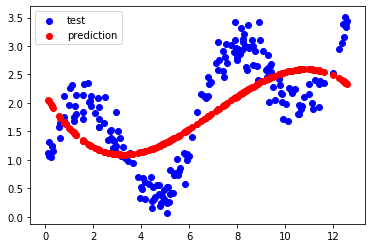

## The best(I think): 
MSE= 0.1006800943208967

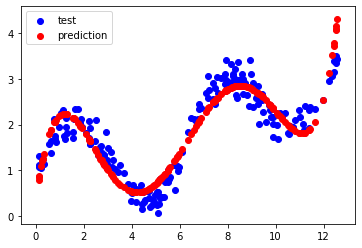

## Overfitted: 
MSE= 0.2286894112602641
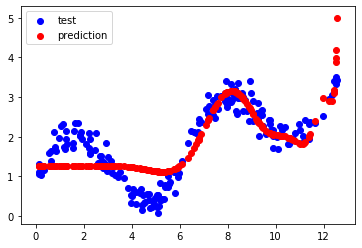


# Observations

your observations:

I noticed that with my code on this dataset: Data transformation degree 20 had the worst Mean Squared Error of about 1.18. Data transformation degree 3 had the second best Mean Squared Error of about 0.833, and data transformation degree 5 had the best Mean Squared Error of about 0.832.


In [6]:
# end